In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
def lennard_jones_potential(r, sigma: float, eps: float) -> np.ndarray:
    return 4*eps*np.power(sigma, 12)/np.power(r, 12) - 4*eps*np.power(sigma, 6)/np.power(r, 6)

def lennard_jones_force(r, sigma: float, eps: float) -> np.ndarray:
    return 24*eps*np.power(sigma, 6)/np.power(r, 7) - 48*eps*np.power(sigma, 12)/np.power(r, 13)

def get_kinetic_energy(m, v):
    return m*(v**2)/2

In [119]:
# %% Parameters
SIGMA = 1
EPS = 1.5
M1 = 1
M2 = 2
SIMULATION_TIME = 7

# %% Initial Conditions
X1_0 = 10
X2_0 = 12
V1_0 = 0
V2_0 = 0

# %% Tuple Indexes
I_X1, I_X2, I_V1, I_V2, I_F1, I_F2 = 0, 1, 2, 3, 4, 5
I_T, I_P, I_EK1, I_EK2, I_ET = 6, 7, 8, 9, 10

In [120]:
def verlet_algo(simulation_time, dt, sigma, eps):
    time = np.arange(0, simulation_time + dt, dt)

    x1 = [X1_0]
    x2 = [X2_0]

    v1 = [V1_0]
    v2 = [V2_0]

    f1 = [lennard_jones_force(X2_0-X1_0, sigma, eps)]
    f2 = [lennard_jones_force(X1_0-X2_0, sigma, eps)]

    a1 = [f1[0] / M1]
    a2 = [f2[0] / M2]

    potential = [lennard_jones_potential(X2_0-X1_0, sigma, eps)]
    energy_kinetic_1 = [get_kinetic_energy(M1, V1_0)]
    energy_kinetic_2 = [get_kinetic_energy(M2, V2_0)]

    total_energy = [potential[0] + energy_kinetic_1[0] + energy_kinetic_2[0]]

    for i in range(len(time) - 1):
        curr = i
        next = i+1
        
        # получим следующие координаты
        x1.append(x1[curr] + v1[curr]*dt + a1[curr] * (dt**2)/2)
        x2.append(x2[curr] + v2[curr]*dt + a2[curr] * (dt**2)/2)

        # получим следующие значения силы и ускорений из следующих координат
        f1.append(lennard_jones_force(x2[next] - x1[next], sigma, eps))
        f2.append(lennard_jones_force(x1[next] - x2[next], sigma, eps))
        a1.append(f1[next] / M1)
        a2.append(f2[next] / M2)

        # получим следующие значения скоростей (РАЗЛИЧИЕ ЗДЕСЬ!)
        v1.append(v1[curr] + ((a1[curr] + a1[next])*dt)/2)
        v2.append(v2[curr] + ((a2[curr] + a2[next])*dt)/2)

        # получим следующее значение потенциала
        potential.append(lennard_jones_potential(x2[next] - x1[next], sigma, eps))

        # получим следующие значения кинетических энергий частиц
        energy_kinetic_1.append(M1 * (v1[next] ** 2) / 2)
        energy_kinetic_2.append(M2 * (v2[next] ** 2) / 2)

        # получим следующее значение полной энергии системы (почему потенциал берем один раз?)
        total_energy.append(potential[next] + energy_kinetic_1[next] + energy_kinetic_2[next])

    return x1, x2, v1, v2, f1, f2, time, potential, energy_kinetic_1, energy_kinetic_2, total_energy

def euler_algo(simulation_time, dt, sigma, eps):
    time = np.arange(0, simulation_time + dt, dt)

    x1 = [X1_0]
    x2 = [X2_0]

    v1 = [V1_0]
    v2 = [V2_0]

    f1 = [lennard_jones_force(X2_0-X1_0, sigma, eps)]
    f2 = [lennard_jones_force(X1_0-X2_0, sigma, eps)]

    a1 = [f1[0] / M1]
    a2 = [f2[0] / M2]

    potential = [lennard_jones_potential(X2_0-X1_0, sigma, eps)]
    energy_kinetic_1 = [get_kinetic_energy(M1, V1_0)]
    energy_kinetic_2 = [get_kinetic_energy(M2, V2_0)]

    total_energy = [potential[0] + energy_kinetic_1[0] + energy_kinetic_2[0]]

    for i in range(len(time) - 1):
        curr = i
        next = i+1
        
        # получим следующие координаты
        x1.append(x1[curr] + v1[curr]*dt + a1[curr] * (dt**2)/2)
        x2.append(x2[curr] + v2[curr]*dt + a2[curr] * (dt**2)/2)

        # получим следующие значения силы и ускорений из следующих координат
        f1.append(lennard_jones_force(x2[next] - x1[next], sigma, eps))
        f2.append(lennard_jones_force(x1[next] - x2[next], sigma, eps))
        a1.append(f1[next] / M1)
        a2.append(f2[next] / M2)

        # получим следующие значения скоростей (РАЗЛИЧИЕ ЗДЕСЬ!)
        v1.append(v1[curr] + a1[curr]*dt)
        v2.append(v2[curr] - a2[curr]*dt)

        # получим следующее значение потенциала
        potential.append(lennard_jones_potential(x2[next] - x1[next], sigma, eps))

        # получим следующие значения кинетических энергий частиц
        energy_kinetic_1.append(M1 * (v1[next] ** 2) / 2)
        energy_kinetic_2.append(M2 * (v2[next] ** 2) / 2)

        # получим следующее значение полной энергии системы (почему потенциал берем один раз?)
        total_energy.append(potential[next] + energy_kinetic_1[next] + energy_kinetic_2[next])

    return x1, x2, v1, v2, f1, f2, time, potential, energy_kinetic_1, energy_kinetic_2, total_energy

# Verlet

In [121]:
delta_t = 0.01

data = verlet_algo(SIMULATION_TIME, delta_t, SIGMA, EPS)

time = data[I_T]

x1_verlet = data[I_X1]
x2_verlet = data[I_X2]

v1_verlet = data[I_V1]
v2_verlet = data[I_V2]

total_energy_verlet = data[I_ET]
potential_verlet = data[I_P]
energy_kinetic1_verlet = data[I_EK1]
energy_kinetic2_verlet = data[I_EK2]

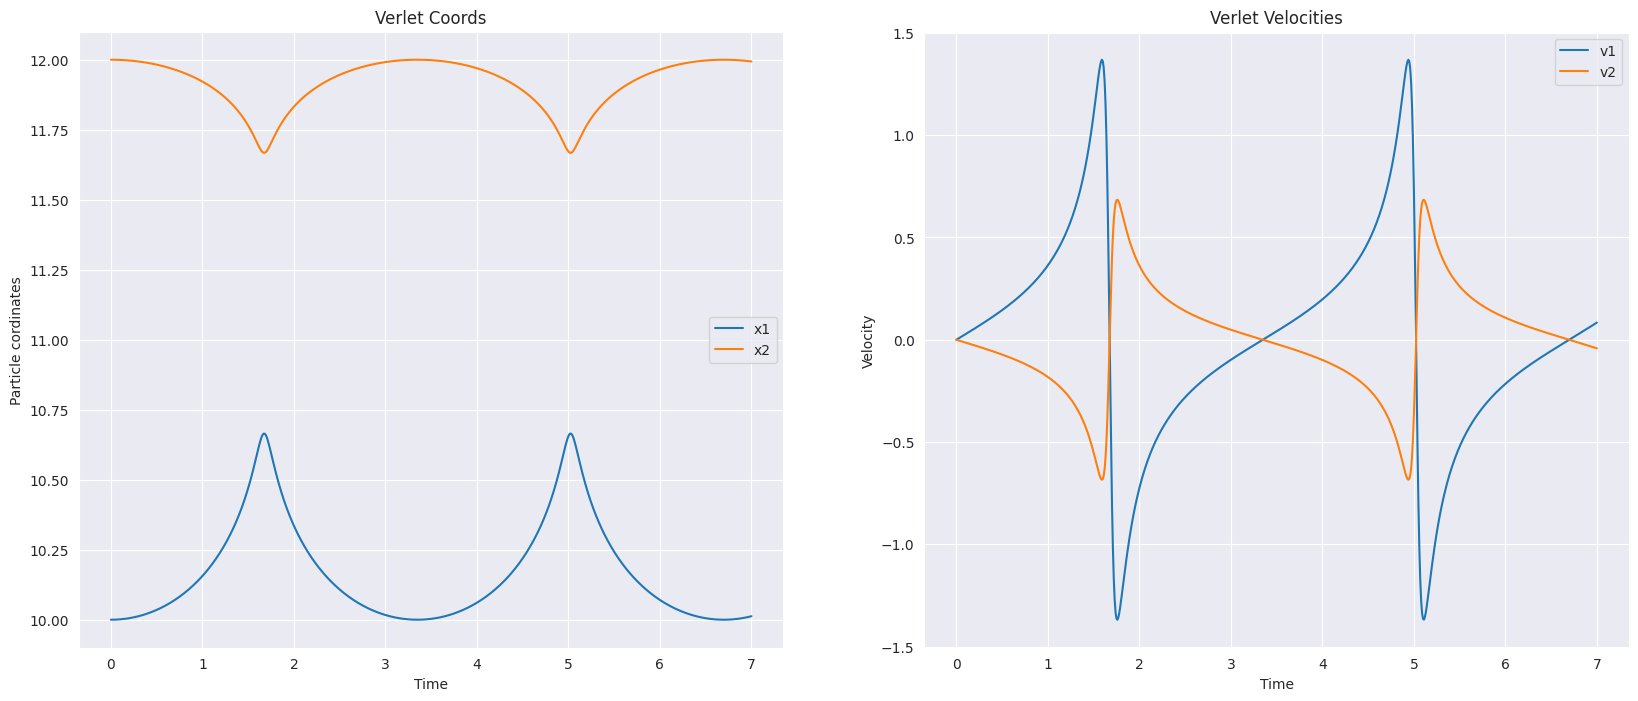

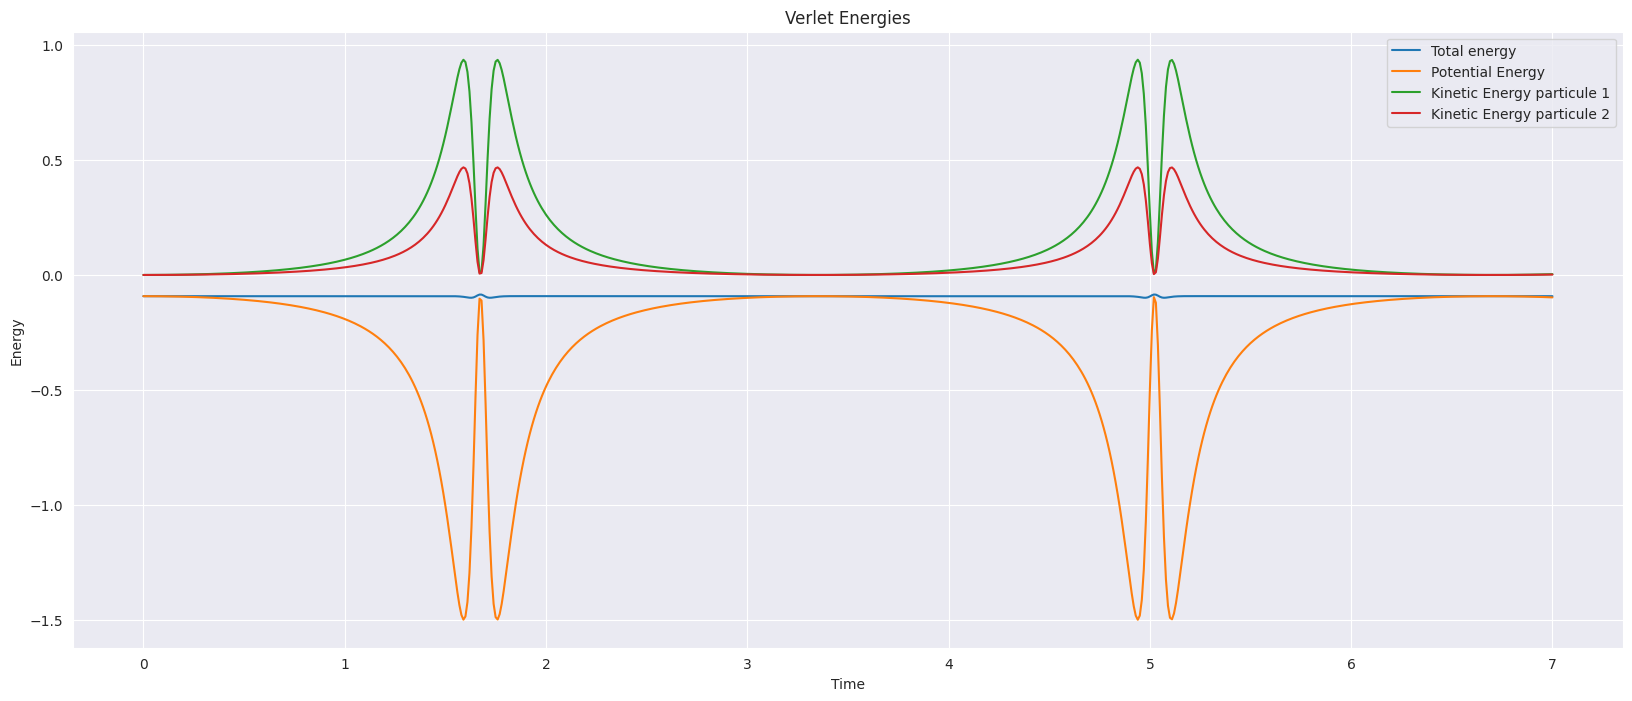

In [122]:
_, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=x1_verlet,
    ax=axes[0],
    label='x1',
)
sns.lineplot(
    x=time,
    y=x2_verlet,
    ax=axes[0],
    label='x2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Particle cordinates')
plot.set_title("Verlet Coords")

plot = sns.lineplot(
    x=time,
    y=v1_verlet,
    ax=axes[1],
    label='v1',
)
sns.lineplot(
    x=time,
    y=v2_verlet,
    ax=axes[1],
    label='v2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Velocity')
plot.set_title("Verlet Velocities")

_, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=total_energy_verlet,
    ax=ax,
    label='Total energy',
)
sns.lineplot(
    x=time,
    y=potential_verlet,
    ax=ax,
    label='Potential Energy',
)
sns.lineplot(
    x=time,
    y=energy_kinetic1_verlet,
    ax=ax,
    label='Kinetic Energy particule 1',
)
sns.lineplot(
    x=time,
    y=energy_kinetic2_verlet,
    ax=ax,
    label='Kinetic Energy particule 2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Energy')
plot.set_title("Verlet Energies");

# Euler

In [124]:
delta_t = 0.01

data = euler_algo(SIMULATION_TIME, delta_t, SIGMA, EPS)

time = data[I_T]

x1_euler = data[I_X1]
x2_euler = data[I_X2]

v1_euler = data[I_V1]
v2_euler = data[I_V2]

total_energy_euler = data[I_ET]
potential_euler = data[I_P]
energy_kinetic1_euler = data[I_EK1]
energy_kinetic2_euler = data[I_EK2]

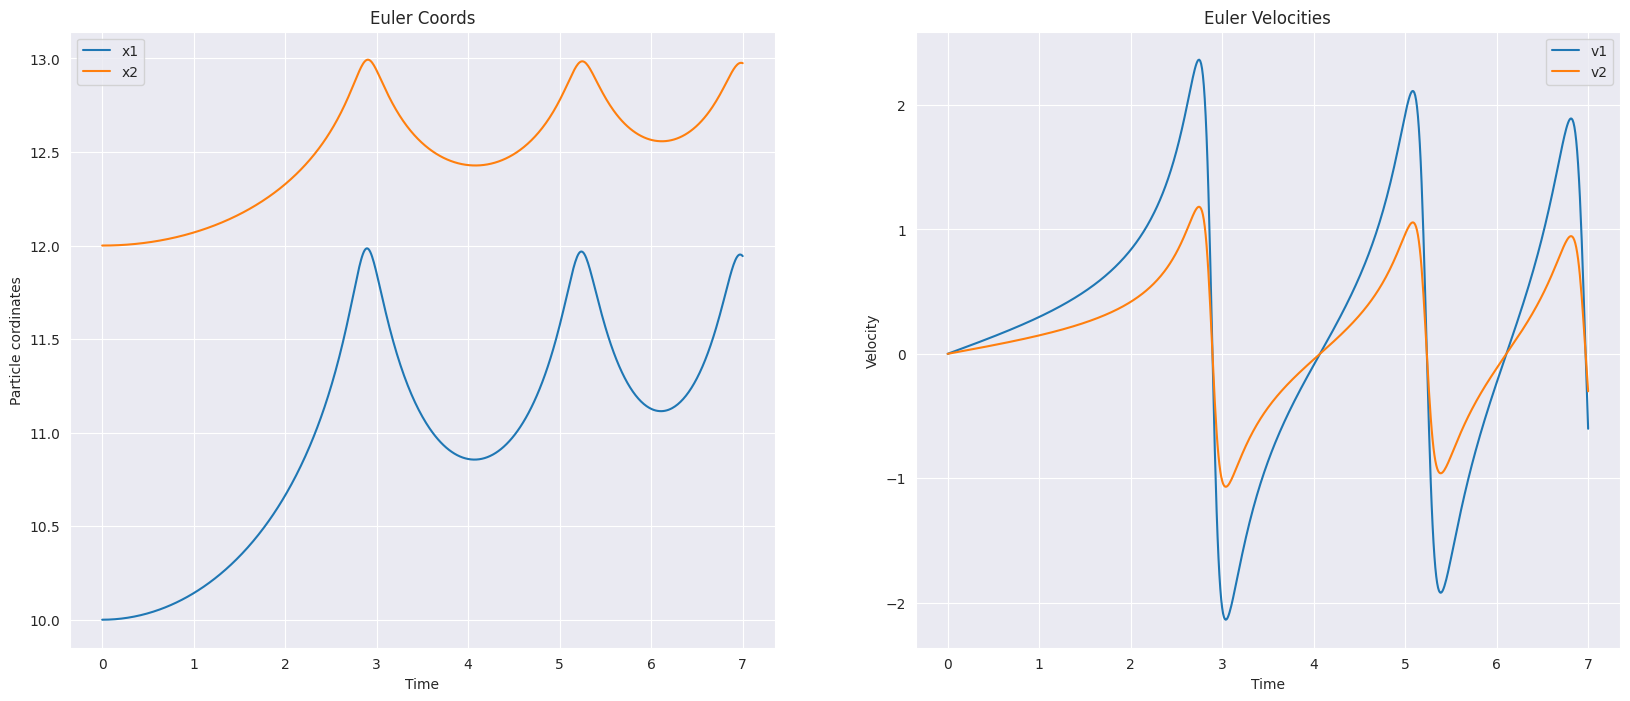

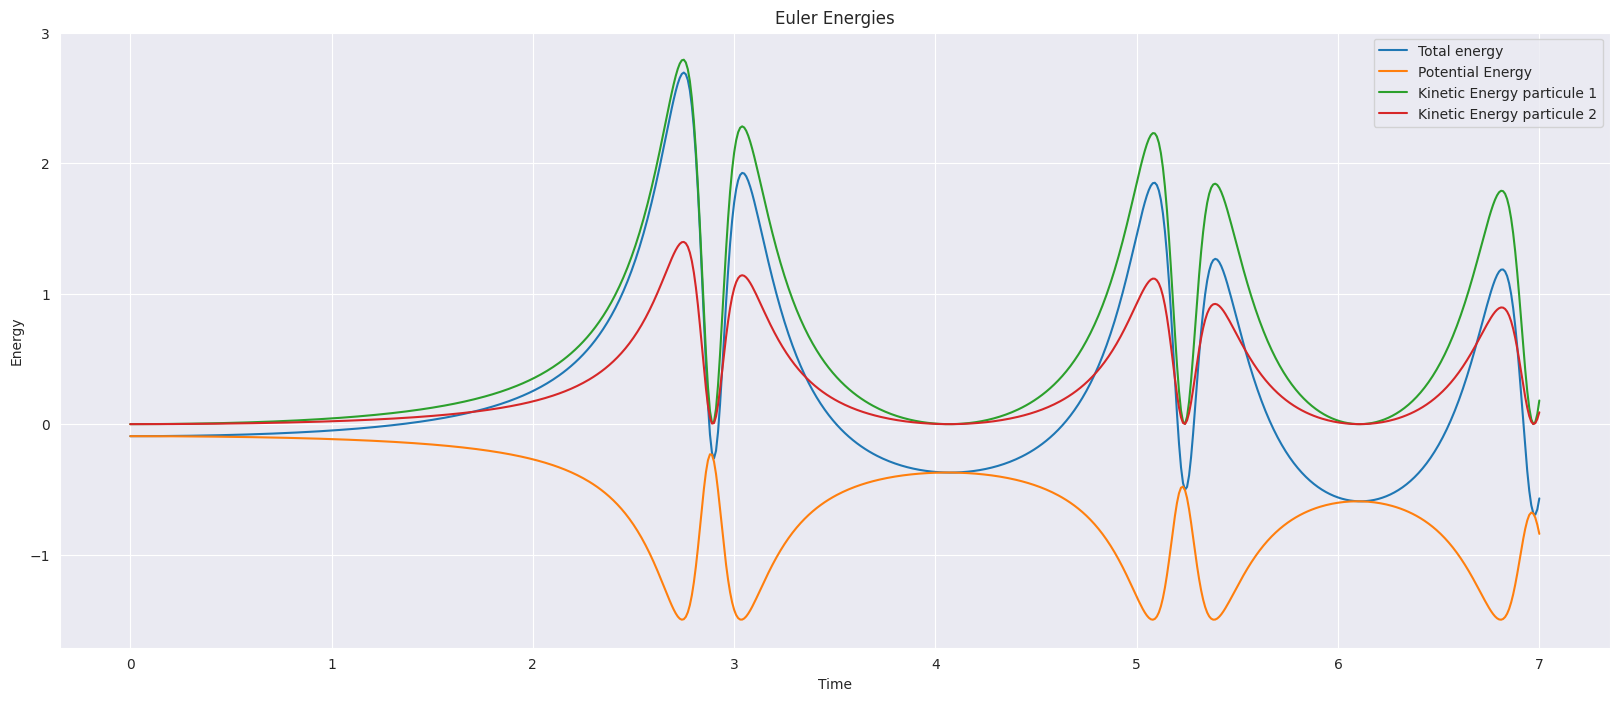

In [125]:
_, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=x1_euler,
    ax=axes[0],
    label='x1',
)
sns.lineplot(
    x=time,
    y=x2_euler,
    ax=axes[0],
    label='x2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Particle cordinates')
plot.set_title("Euler Coords")

plot = sns.lineplot(
    x=time,
    y=v1_euler,
    ax=axes[1],
    label='v1',
)
sns.lineplot(
    x=time,
    y=v2_euler,
    ax=axes[1],
    label='v2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Velocity')
plot.set_title("Euler Velocities")

_, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=total_energy_euler,
    ax=ax,
    label='Total energy',
)
sns.lineplot(
    x=time,
    y=potential_euler,
    ax=ax,
    label='Potential Energy',
)
sns.lineplot(
    x=time,
    y=energy_kinetic1_euler,
    ax=ax,
    label='Kinetic Energy particule 1',
)
sns.lineplot(
    x=time,
    y=energy_kinetic2_euler,
    ax=ax,
    label='Kinetic Energy particule 2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Energy')
plot.set_title("Euler Energies");

# Comparison

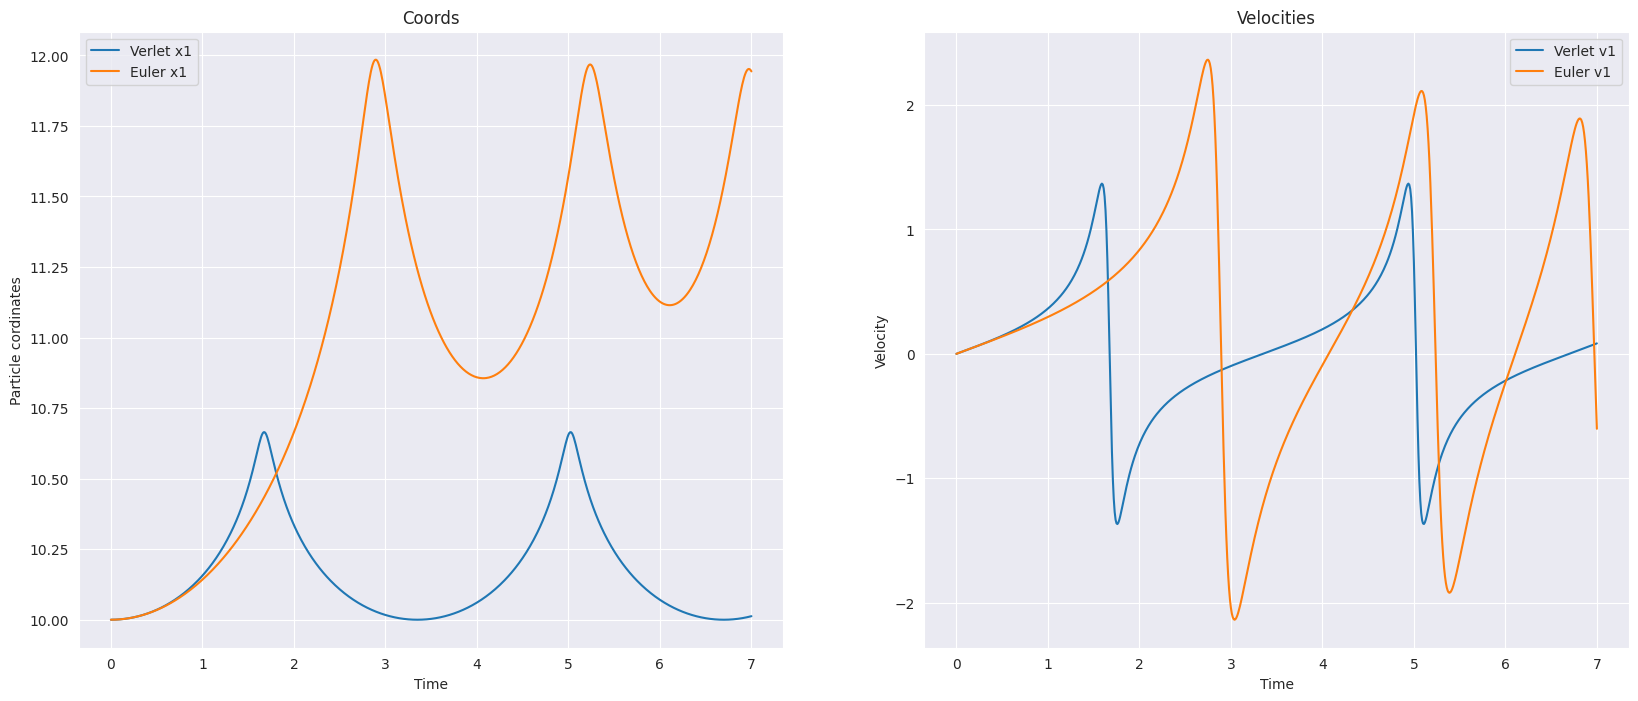

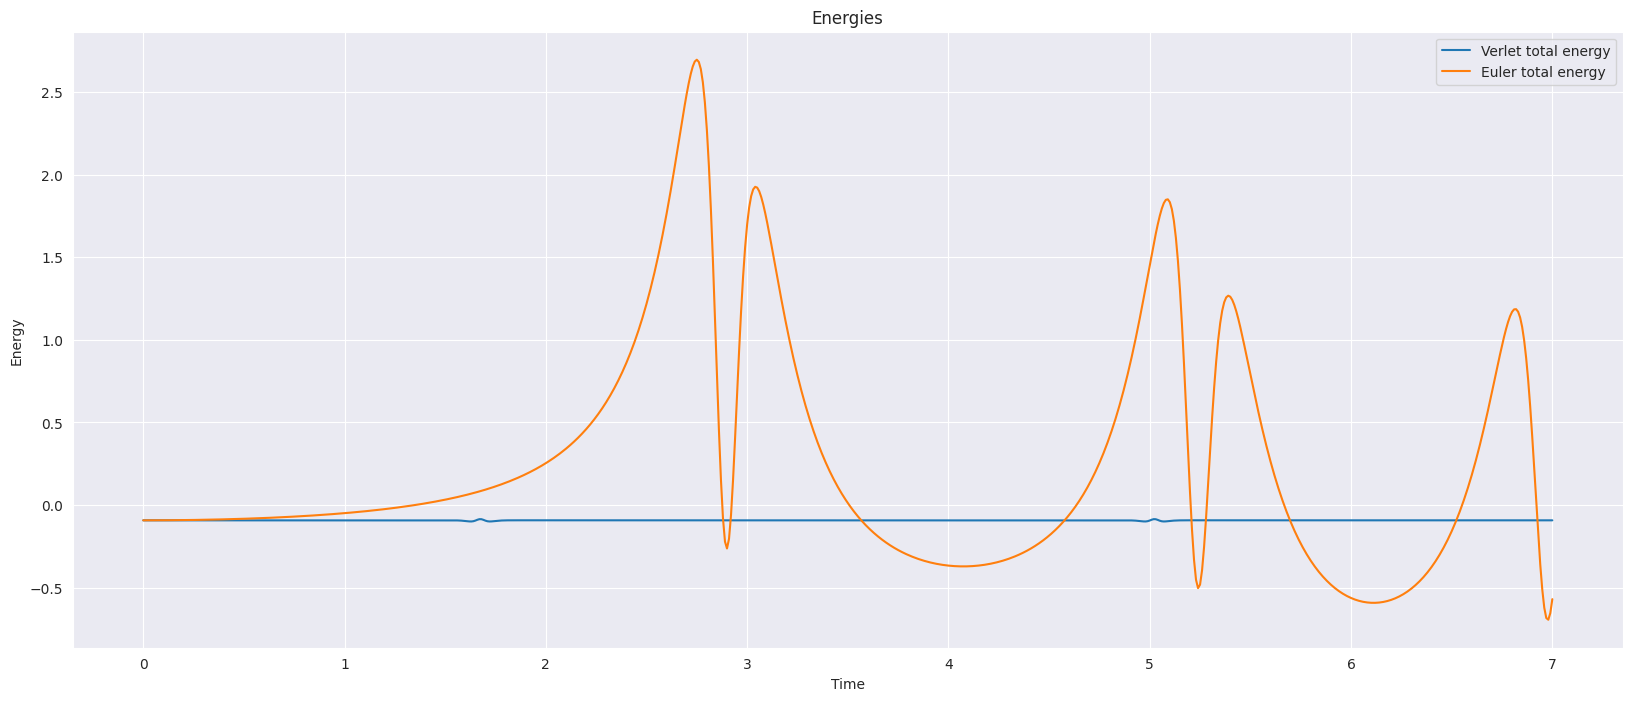

In [127]:
_, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=x1_verlet,
    ax=axes[0],
    label='Verlet x1',
)
sns.lineplot(
    x=time,
    y=x1_euler,
    ax=axes[0],
    label='Euler x1',
)
plot.set_xlabel('Time')
plot.set_ylabel('Particle cordinates')
plot.set_title("Coords")

plot = sns.lineplot(
    x=time,
    y=v1_verlet,
    ax=axes[1],
    label='Verlet v1',
)
sns.lineplot(
    x=time,
    y=v1_euler,
    ax=axes[1],
    label='Euler v1',
)
plot.set_xlabel('Time')
plot.set_ylabel('Velocity')
plot.set_title("Velocities")

_, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=total_energy_verlet,
    ax=ax,
    label='Verlet total energy',
)
sns.lineplot(
    x=time,
    y=total_energy_euler,
    ax=ax,
    label='Euler total energy',
)
plot.set_xlabel('Time')
plot.set_ylabel('Energy')
plot.set_title("Energies");